# Let's learn about computer vision.
  
This notebook represents my notes and examples going through the [Computer Vision: Algorithms and Applications](http://szeliski.org/Book/) book by Richard Szeliski. Here I go through examples of different computer vision techniques, starting at the basics and leading up to object detection and co-segmentation (eventually). I also explain core techniques as a reference for myself when I revisit implementations of different computer vision algorithms.

## First Case: Image Filtering

Suppose we wanted to clean up an image by increasing the sharpness, decreasing noise, smoothing edges, etc. We can apply **linear filters** to an image, which can blend together a target pixel with neighboring pixels in some way to achieve some desired effect like the ones mentioned earlier. These linear filters operate by applying some **mask** or **kernel** operator to each pixel, which weights the impact of neighboring pixels on the current pixel. For example, the 3x3 mask:

| 0 | 0 | 0 |
|---|---|---|
| 0 | 1 | 0 |
| 0 | 0 | 0 |

simply ignores all the neighboring pixels, meaning that applying this mask does nothing to change the image.

How exactly do we apply the mask to an image? We use what's called a *convolution* operator. Given a pixel at location $(x, y)$ in image $I$ and a mask $h$, the resulting pixel $I'(x, y)$ can be computed as:

$\sum_{i,j} I(x, y) h(x - i, y - j)$

where $i, j$ are all different positions within the mask $h$. And what if $x - i$ or $y - j < 0$? We can just pad the image, i.e. pretend there were 0s or some constant there.

Let's write some code to implement applying a filter to a 2D matrix (e.g. a grayscale image):

In [44]:
# Perform a 2d convolution, i.e. original * mask, where original
# is the original image pixels as a 2D numpy array and mask is the
# filter to apply to each pixel. For simplicity, assume the mask is
# a square.
def convolve_2d(original, mask):
    convolved = original.copy()
    mask_center_idx = int(len(mask) / 2)
    
    for original_row_idx in range(len(original)):
        for original_col_idx in range(len(original[original_row_idx])):
            original_pixel_value = original[original_row_idx][original_col_idx]
            
            new_pixel_value = 0
            for mask_row_idx in range(len(mask)):
                for mask_col_idx in range(len(mask[mask_row_idx])):
                    row_idx_center_offset = mask_row_idx - mask_center_idx
                    col_idx_center_offset = mask_col_idx - mask_center_idx
                    
                    original_convolution_row_idx = original_row_idx + row_idx_center_offset
                    original_convolution_col_idx = original_col_idx + col_idx_center_offset
                    
                    if original_convolution_row_idx < 0 or \
                            original_convolution_col_idx < 0 or \
                            original_convolution_row_idx >= len(original) or \
                            original_convolution_col_idx >= len(original[original_row_idx]):
                        new_pixel_value += 0
                    else:
                        original_pixel_value = \
                            original[original_convolution_row_idx][original_convolution_col_idx]
                        mask_coeff = mask[mask_row_idx][mask_col_idx]
                        new_pixel_value += int(original_pixel_value * mask_coeff)
            convolved[original_row_idx][original_col_idx] = min(max(0, new_pixel_value), 255)
    return convolved

Great! Let's test this out. Here's the original image:

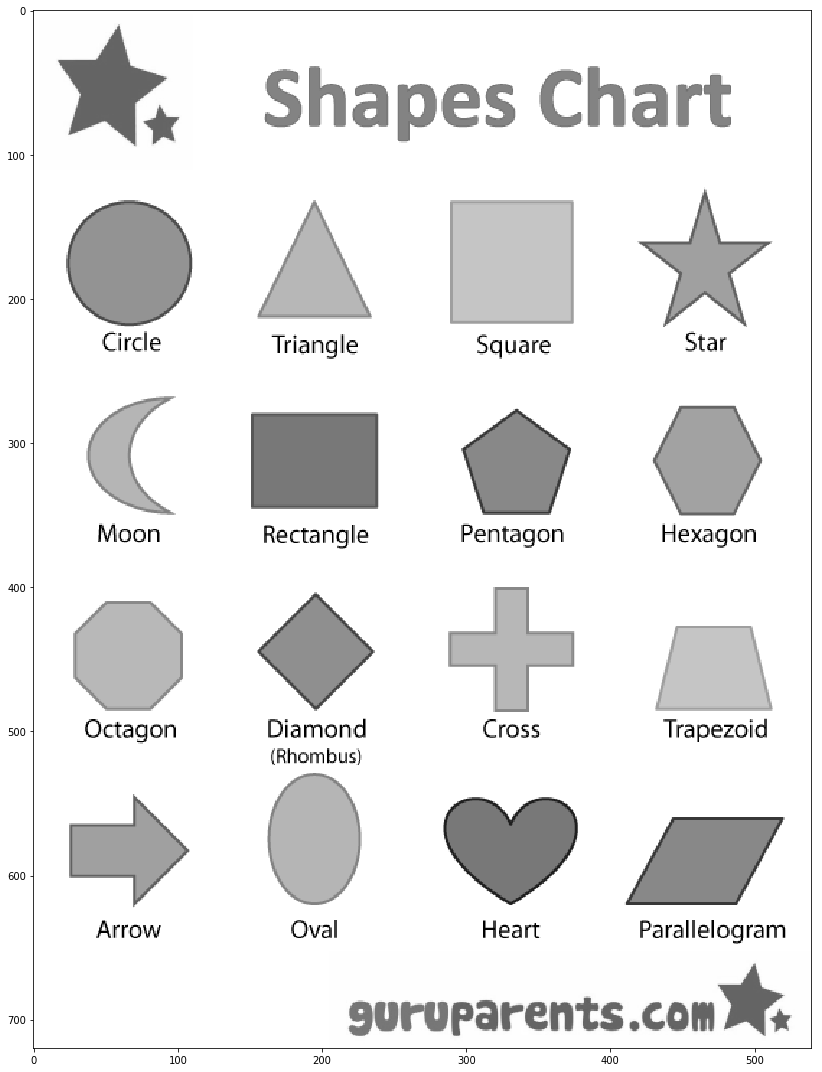

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

test_image = cv2.imread('./sample_images/Shapes.png', cv2.IMREAD_GRAYSCALE)
figure, axes = plt.subplots(figsize=(12, 15))
axes.imshow(test_image, cmap='gray')
plt.tight_layout()
plt.show()


Now let's convolve it with some different masks and display them:

In [42]:
# Random kernel I picked.
test_kernel = np.array([
    [0.1, 0.2, 0.4],
    [0.2, 0.8, 0.2],
    [0.2, 0.4, 1.0]
])

# Gaussian 3x3 smoothing kernel.
gaussian_kernel = np.array([
    [0.0625, 0.1250, 0.0625],
    [0.1250, 0.2500, 0.1250],
    [0.0625, 0.1250, 0.0625]
])

# Sobel kernel.
sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * 0.125

# Corner detection kernel.
corner_detetion_kernel = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
]) * 0.25

applying mask to image...
done.


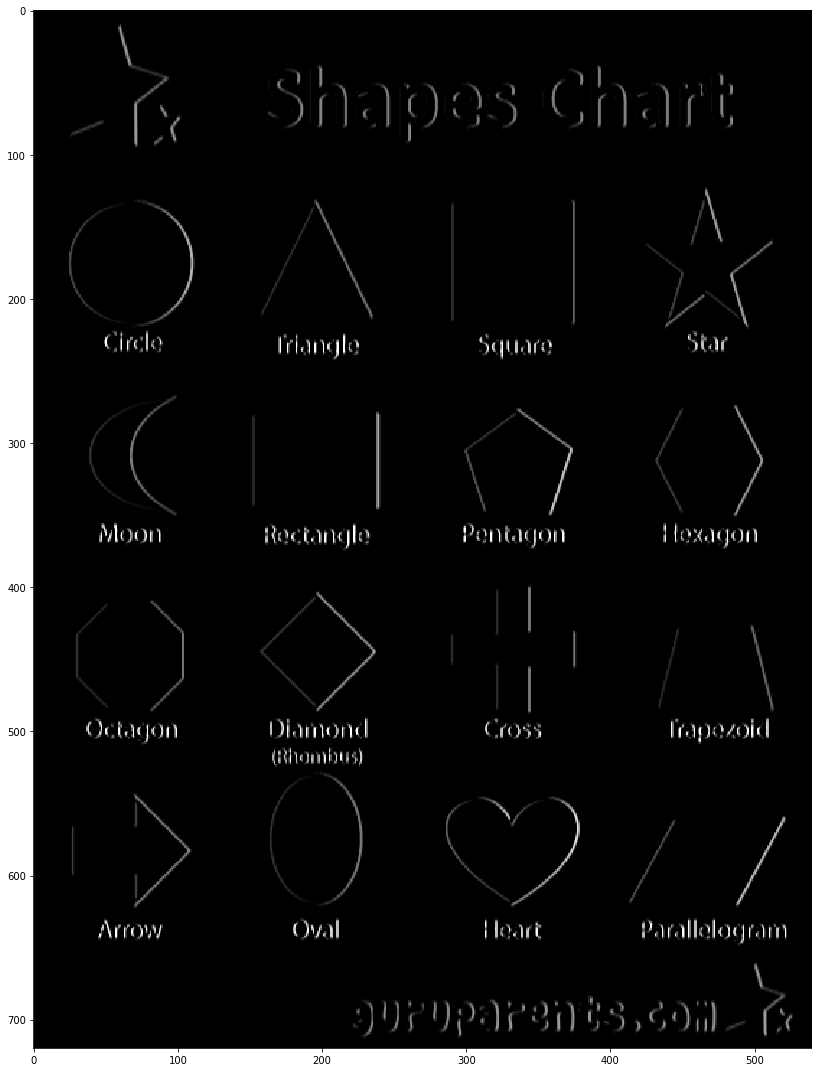

In [45]:
print("applying mask to image...")
filtered_image = convolve_2d(test_image, sobel_kernel)
print("done.")

figure, axes = plt.subplots(figsize=(12, 15))
axes.imshow(filtered_image, cmap='gray')
plt.tight_layout()
plt.show()

Realistically, this code is extremely slow and can be optimized for better speed; however, we should take advantages of libraries like OpenCV to do these kinds of basic operations. Let's do the same thing via OpenCV:

applying mask to image...
done.


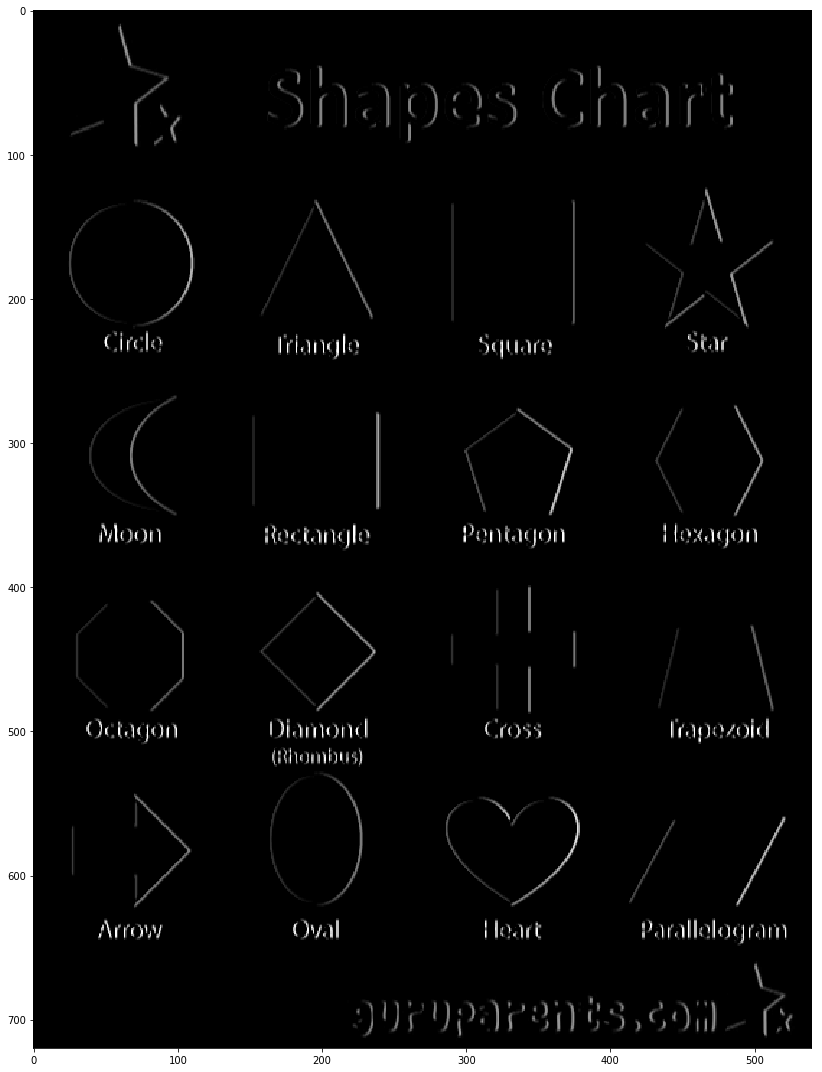

In [46]:
print("applying mask to image...")
filtered_image = cv2.filter2D(test_image, -1, sobel_kernel)
print("done.")

figure, axes = plt.subplots(figsize=(12, 15))
axes.imshow(filtered_image, cmap='gray')
plt.tight_layout()
plt.show()